In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Путь к твоему файлу (вставь путь свой, из шага выше)
wadi_path = '/content/drive/MyDrive/Anomaly Detection Project/WADI_14days_new.csv'

# Считаем только часть файла
wadi_df = pd.read_csv(wadi_path, nrows=100000)

# Проверка
print(wadi_df.shape)
wadi_df.head()


(100000, 130)


,Row,Date,Time,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,1_LS_001_AL,...,3_MV_001_STATUS,3_MV_002_STATUS,3_MV_003_STATUS,3_P_001_STATUS,3_P_002_STATUS,3_P_003_STATUS,3_P_004_STATUS,LEAK_DIFF_PRESSURE,PLANT_START_STOP_LOG,TOTAL_CONS_REQUIRED_FLOW
0,1,9/25/2017,00:00.0,171.155,0.619473,11.5759,504.645,0.318319,0.001157,0,...,1,1,1,1,1,1,1,67.9651,1,0.68
1,2,9/25/2017,00:01.0,171.155,0.619473,11.5759,504.645,0.318319,0.001157,0,...,1,1,1,1,1,1,1,67.9651,1,0.68
2,3,9/25/2017,00:02.0,171.155,0.619473,11.5759,504.645,0.318319,0.001157,0,...,1,1,1,1,1,1,1,67.9651,1,0.68
3,4,9/25/2017,00:03.0,171.155,0.607477,11.5725,504.673,0.318438,0.001207,0,...,1,1,1,1,1,1,1,67.1948,1,0.68
4,5,9/25/2017,00:04.0,171.155,0.607477,11.5725,504.673,0.318438,0.001207,0,...,1,1,1,1,1,1,1,67.1948,1,0.68


In [ ]:
attack_labels_path = '/content/drive/MyDrive/Anomaly Detection Project/WADI_attackdataLABLE.csv'
attack_df = pd.read_csv(attack_labels_path)


<ipython-input-3-72f0d10f0fcf>:2: DtypeWarning: Columns (0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130) have mixed types. Specify dtype option on import or set low_memory=False.
  attack_df = pd.read_csv(attack_labels_path)


In [ ]:
print(attack_df.shape)
print(attack_df.columns)
attack_df.head()


(172804, 131)
Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '121', '122', '123', '124', '125', '126', '127', '128', '129', '130'],
      dtype='object', length=131)


,0,1,2,3,4,5,6,7,8,9,...,121,122,123,124,125,126,127,128,129,130
0,Row,Date,Time,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,1_LS_001_AL,...,3_MV_002_STATUS,3_MV_003_STATUS,3_P_001_STATUS,3_P_002_STATUS,3_P_003_STATUS,3_P_004_STATUS,LEAK_DIFF_PRESSURE,PLANT_START_STOP_LOG,TOTAL_CONS_REQUIRED_FLOW,"Attack LABLE (1:No Attack, -1:Attack)"
1,1,10/9/17,00:00.0,164.21,0.529486,11.9972,482.48,0.331167,0.00127323,0,...,1,1,1,1,1,1,62.6226,1,0.39,1
2,2,10/9/17,00:01.0,164.21,0.529486,11.9972,482.48,0.331167,0.00127323,0,...,1,1,1,1,1,1,62.6226,1,0.39,1
3,3,10/9/17,00:02.0,164.21,0.529486,11.9972,482.48,0.331167,0.00127323,0,...,1,1,1,1,1,1,62.6226,1,0.39,1
4,4,10/9/17,00:03.0,164.21,0.529486,11.9972,482.48,0.331167,0.00127323,0,...,1,1,1,1,1,1,62.6226,1,0.39,1


In [ ]:
import pandas as pd
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Preprocess the training data: remove non-numeric columns, then fill NaN and scale data
wadi_clean = wadi_df.select_dtypes(include=['float64', 'int64'])

# Replace infinite values with NaN
wadi_clean = wadi_clean.replace([np.inf, -np.inf], np.nan)

# Drop columns with no observed values (entirely NaN columns)
wadi_clean = wadi_clean.dropna(axis=1, how='all')

# Impute NaN values using SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')
wadi_clean = pd.DataFrame(imputer.fit_transform(wadi_clean), columns=wadi_clean.columns)

# Verify if NaNs are filled
print("Number of NaNs after filling:", wadi_clean.isnull().sum().sum())

# Scale the data
scaler = StandardScaler()
wadi_scaled = scaler.fit_transform(wadi_clean)

# Check if there are any NaNs in the scaled data
if np.any(np.isnan(wadi_scaled)):
    print("Warning: There are still NaN values after scaling!")
else:
    print("No NaN values in the scaled data.")

# Train the One-Class SVM model
model = OneClassSVM(kernel='rbf', nu=0.2, gamma='scale')
model.fit(wadi_scaled)

# Predict on training data to inspect class balance
train_preds = model.predict(wadi_scaled)
print("Training prediction counts:")
print(pd.Series(train_preds).value_counts())



Number of NaNs after filling: 0
No NaN values in the scaled data.
Training prediction counts:
 1    79996
-1    20004
Name: count, dtype: int64


In [ ]:
# Сохрани столбцы, которые были при обучении
# Например, если ты обучал на wadi_clean:
train_columns = wadi_clean.columns

# Убедись, что attack_df содержит только нужные колонки
# Сначала оставим только те, что были во время тренировки
attack_clean = attack_df.copy()
attack_clean = attack_clean[attack_clean.columns.intersection(train_columns)]

# Затем переупорядочим строго в том порядке, как было при обучении
attack_clean = attack_clean.reindex(columns=train_columns, fill_value=0)

# Преобразуем в числовой формат и заполним NaN
attack_clean = attack_clean.apply(pd.to_numeric, errors='coerce').fillna(0)

# Теперь можно безопасно скейлить
attack_scaled = scaler.transform(attack_clean)


In [ ]:
attack_df.columns
attack_df.head()


,0,1,2,3,4,5,6,7,8,9,...,121,122,123,124,125,126,127,128,129,130
0,Row,Date,Time,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,1_LS_001_AL,...,3_MV_002_STATUS,3_MV_003_STATUS,3_P_001_STATUS,3_P_002_STATUS,3_P_003_STATUS,3_P_004_STATUS,LEAK_DIFF_PRESSURE,PLANT_START_STOP_LOG,TOTAL_CONS_REQUIRED_FLOW,"Attack LABLE (1:No Attack, -1:Attack)"
1,1,10/9/17,00:00.0,164.21,0.529486,11.9972,482.48,0.331167,0.00127323,0,...,1,1,1,1,1,1,62.6226,1,0.39,1
2,2,10/9/17,00:01.0,164.21,0.529486,11.9972,482.48,0.331167,0.00127323,0,...,1,1,1,1,1,1,62.6226,1,0.39,1
3,3,10/9/17,00:02.0,164.21,0.529486,11.9972,482.48,0.331167,0.00127323,0,...,1,1,1,1,1,1,62.6226,1,0.39,1
4,4,10/9/17,00:03.0,164.21,0.529486,11.9972,482.48,0.331167,0.00127323,0,...,1,1,1,1,1,1,62.6226,1,0.39,1


In [ ]:
print(true_labels.value_counts())


130
-1    172804
Name: count, dtype: int64


In [ ]:

if np.any(np.isnan(attack_scaled)):
    print("Warning: There are still NaN values in the attack dataset after scaling!")
else:
    print("No NaN values in the attack dataset after scaling.")

# Predict anomalies in the attack dataset
attack_preds = model.predict(attack_scaled)

# Extract true labels (assumes the last column contains labels like 'Normal' or 'Attack')
true_labels = attack_df.iloc[:, -1].astype(str).apply(lambda x: 1 if 'Normal' in x else -1)

# Evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report

No NaN values in the attack dataset after scaling.


Confusion Matrix:
[[172804]]

Classification Report:
              precision    recall  f1-score   support

     Anomaly       1.00      1.00      1.00    172804
      Normal       0.00      0.00      0.00         0

    accuracy                           1.00    172804
   macro avg       0.50      0.50      0.50    172804
weighted avg       1.00      1.00      1.00    172804



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-s

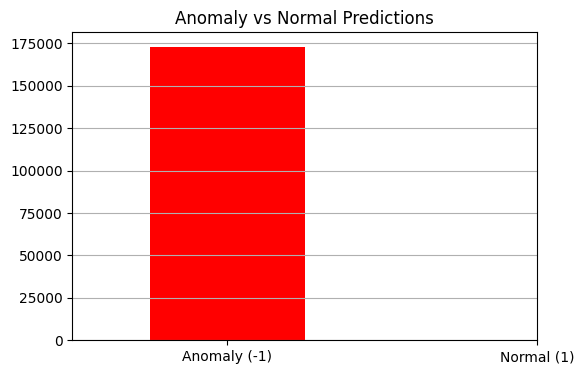

In [ ]:
# Evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(true_labels, attack_preds))
print("\nClassification Report:")
# Assuming your model only predicts -1 (Anomaly) and 1 (Normal)
print(classification_report(true_labels, attack_preds, target_names=['Anomaly', 'Normal'], labels=[-1, 1]))

# Optional: visualize prediction distribution
plt.figure(figsize=(6, 4))
pd.Series(attack_preds).value_counts().sort_index().plot(kind='bar', color=['red', 'green'])
plt.title("Anomaly vs Normal Predictions")
plt.xticks([0, 1], ['Anomaly (-1)', 'Normal (1)'], rotation=0)
plt.grid(axis='y')
plt.show()

In [ ]:
# Предположим, у тебя есть train_df или normal_df с нормальными метками
# Если у тебя есть нормальные данные с label=1, например:
# normal_df = full_df[full_df['Attack LABLE (1:No Attack, -1:Attack)'] == 1]

# You need to replace 'train_df' with your actual DataFrame containing normal data
# For example, if 'wadi_df' from earlier cells contains your normal data, you can use:
# train_df = wadi_df[wadi_df['your_label_column'] == 1]
# Replace 'your_label_column' with the actual column name containing the labels

# If you don't have a separate DataFrame for normal data,
# you can try extracting it from 'attack_df' assuming it has normal samples:
train_df = attack_df[attack_df.iloc[:, -1] == 1].copy() # Assuming last column has labels

# 1. Отделим аномалии
anomaly_df = attack_df[attack_df.iloc[:, -1] == -1]

# 2. Отберём нормальные строки из train_df или другого набора
normal_df = train_df[train_df.iloc[:, -1] == 1]  # Уточни источник

# 3. Сбалансируем (по количеству)
sample_size = min(len(normal_df), len(anomaly_df))
normal_sample = normal_df.sample(n=sample_size, random_state=42)
anomaly_sample = anomaly_df.sample(n=sample_size, random_state=42)

# 4. Объединим и перемешаем
mixed_df = pd.concat([normal_sample, anomaly_sample]).sample(frac=1, random_state=42).reset_index(drop=True)

# 5. Разделим X и y
X_test = mixed_df.drop(columns=[mixed_df.columns[-1]])  # Фичи
y_test = mixed_df.iloc[:, -1].astype(int)  # Метки

# 6. Приведём к числовому виду, заполним пропуски
X_test = X_test.apply(pd.to_numeric, errors='coerce').fillna(0)

# 7. Убедимся, что порядок фичей совпадает с обучающим
X_test = X_test.reindex(columns=train_columns, fill_value=0)

# 8. Масштабируем
X_test_scaled = scaler.transform(X_test)

# 9. Предсказание
y_pred = model.predict(X_test_scaled)

# 10. Метрики
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Attack (-1)', 'Normal (1)'], labels=[-1, 1]))

Confusion Matrix:
[[9977    0]
 [9977    0]]

Classification Report:
              precision    recall  f1-score   support

 Attack (-1)       0.50      1.00      0.67      9977
  Normal (1)       0.00      0.00      0.00      9977

    accuracy                           0.50     19954
   macro avg       0.25      0.50      0.33     19954
weighted avg       0.25      0.50      0.33     19954



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# 1. Подготовим нормальные и аномальные данные
normal_df = attack_df[attack_df.iloc[:, -1] == 1].copy()
anomaly_df = attack_df[attack_df.iloc[:, -1] == -1].copy()

# 2. Сбалансируем
sample_size = min(len(normal_df), len(anomaly_df))
normal_sample = normal_df.sample(n=sample_size, random_state=42)
anomaly_sample = anomaly_df.sample(n=sample_size, random_state=42)

# 3. Объединяем и мешаем
balanced_df = pd.concat([normal_sample, anomaly_sample]).sample(frac=1, random_state=42)

# 4. Разделяем X и y
X = balanced_df.drop(columns=[balanced_df.columns[-1]])
y = balanced_df.iloc[:, -1].astype(int)

# 5. Чистим, заполняем и масштабируем
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)
train_columns = X.columns.tolist()  # сохраним для использования на тесте
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Обучаем модель
clf = RandomForestClassifier(random_state=42)
clf.fit(X_scaled, y)

# 7. Готовим тест
X_test = mixed_df.drop(columns=[mixed_df.columns[-1]])
y_test = mixed_df.iloc[:, -1].astype(int)
X_test = X_test.apply(pd.to_numeric, errors='coerce').fillna(0)
X_test = X_test.reindex(columns=train_columns, fill_value=0)
X_test_scaled = scaler.transform(X_test)

# 8. Предсказываем
y_pred = clf.predict(X_test_scaled)

# 9. Метрики
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Attack (-1)', 'Normal (1)'], labels=[-1, 1]))


Confusion Matrix:
[[9977    0]
 [   0 9977]]

Classification Report:
              precision    recall  f1-score   support

 Attack (-1)       1.00      1.00      1.00      9977
  Normal (1)       1.00      1.00      1.00      9977

    accuracy                           1.00     19954
   macro avg       1.00      1.00      1.00     19954
weighted avg       1.00      1.00      1.00     19954



In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

# Стратифицированная кросс-валидация
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []

# Convert y to a NumPy array to ensure positional indexing
y_array = y.to_numpy()

# Собираем отчеты по каждому фолду
for train_index, test_index in kf.split(X_scaled, y_array):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_array[train_index], y_array[test_index]

    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    report = classification_report(y_test, y_pred, output_dict=True)
    results.append(report)

# Преобразуем отчеты в DataFrame для удобства работы
df_results = pd.DataFrame(results)

# Instead of directly calculating the mean, access specific metrics and average them
# For example, to average precision for class '-1':
mean_precision_neg1 = df_results.apply(lambda row: row["-1"]["precision"], axis=1).mean()
mean_recall_neg1 = df_results.apply(lambda row: row["-1"]["recall"], axis=1).mean()
mean_f1_score_neg1 = df_results.apply(lambda row: row["-1"]["f1-score"], axis=1).mean()

mean_precision_1 = df_results.apply(lambda row: row["1"]["precision"], axis=1).mean()
mean_recall_1 = df_results.apply(lambda row: row["1"]["recall"], axis=1).mean()
mean_f1_score_1 = df_results.apply(lambda row: row["1"]["f1-score"], axis=1).mean()


# Print or use the averaged metrics as needed
print(f"Average Precision for class -1: {mean_precision_neg1}")
print(f"Average Recall for class -1: {mean_recall_neg1}")
print(f"Average F1-score for class -1: {mean_f1_score_neg1}")

print(f"Average Precision for class 1: {mean_precision_1}")
print(f"Average Recall for class 1: {mean_recall_1}")
print(f"Average F1-score for class 1: {mean_f1_score_1}")

Average Precision for class -1: 0.9980993995996998
Average Recall for class -1: 1.0
Average F1-score for class -1: 0.999048735781996
Average Precision for class 1: 1.0
Average Recall for class 1: 0.9980956901271215
Average F1-score for class 1: 0.9990468772254303


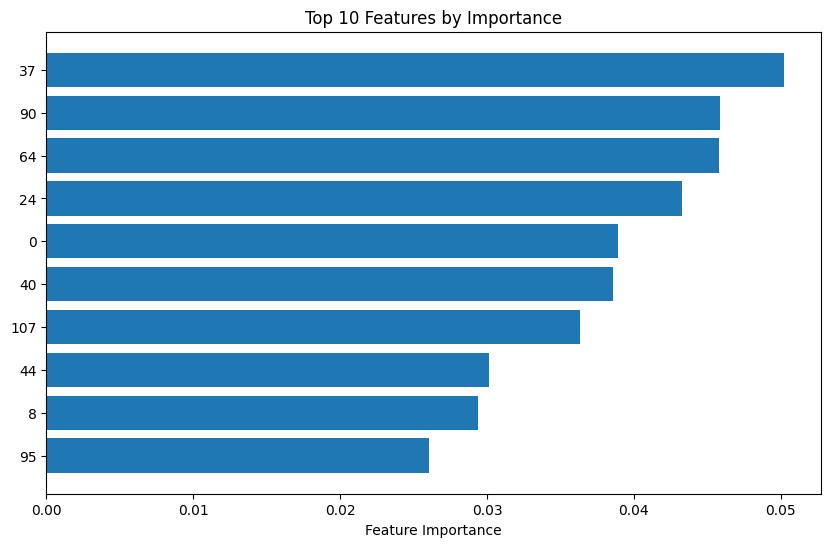

In [ ]:
import matplotlib.pyplot as plt

# Важность признаков
feature_importances = clf.feature_importances_
sorted_idx = feature_importances.argsort()[-10:]  # Топ-10 признаков
plt.figure(figsize=(10, 6))
plt.barh(range(10), feature_importances[sorted_idx], align="center")
plt.yticks(range(10), [train_columns[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Top 10 Features by Importance")
plt.show()


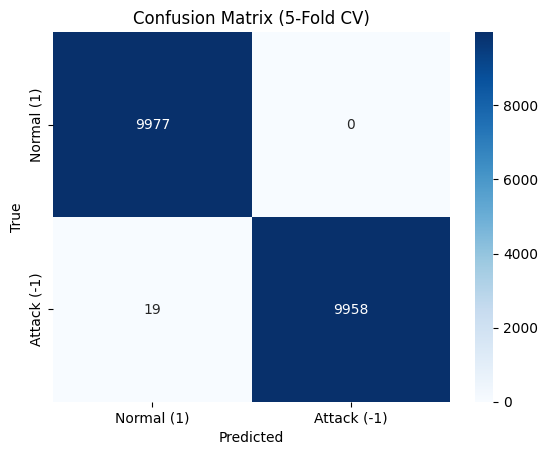

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Матрица путаницы
y_true = []
y_pred = []
for train_index, test_index in kf.split(X_scaled, y):
  X_train, X_test = X_scaled[train_index], X_scaled[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index] # Accessing values using iloc
  clf.fit(X_train, y_train)
  y_true.extend(y_test)
  y_pred.extend(clf.predict(X_test))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal (1)', 'Attack (-1)'], yticklabels=['Normal (1)', 'Attack (-1)'])
plt.title("Confusion Matrix (5-Fold CV)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

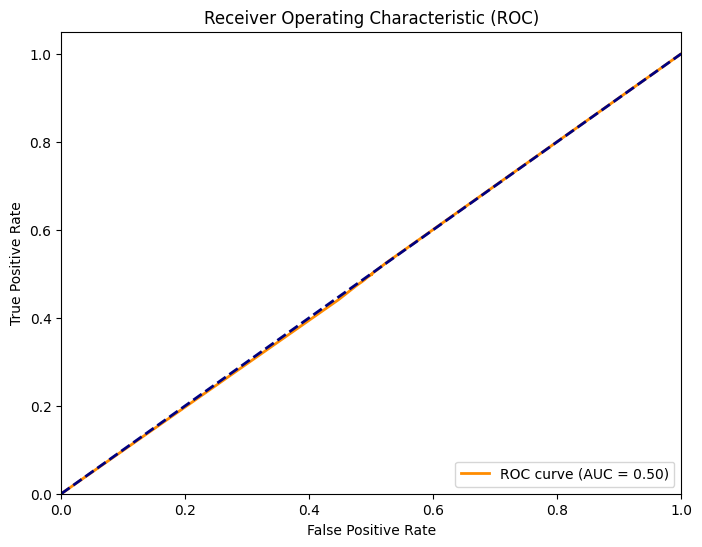

In [ ]:
from sklearn.metrics import roc_curve, auc

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, clf.predict_proba(X_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


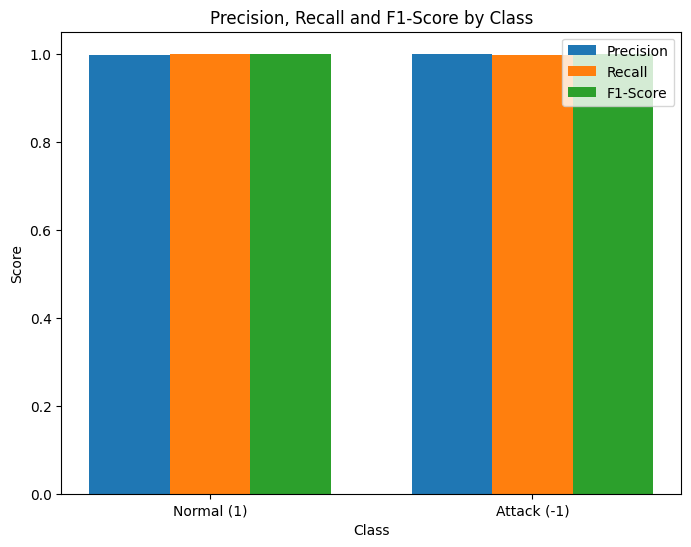

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Сравнение метрик
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average=None)

fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.25
index = np.arange(2)
bar1 = ax.bar(index, precision, bar_width, label="Precision")
bar2 = ax.bar(index + bar_width, recall, bar_width, label="Recall")
bar3 = ax.bar(index + 2*bar_width, f1, bar_width, label="F1-Score")

ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_title('Precision, Recall and F1-Score by Class')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(['Normal (1)', 'Attack (-1)'])
ax.legend()

plt.show()


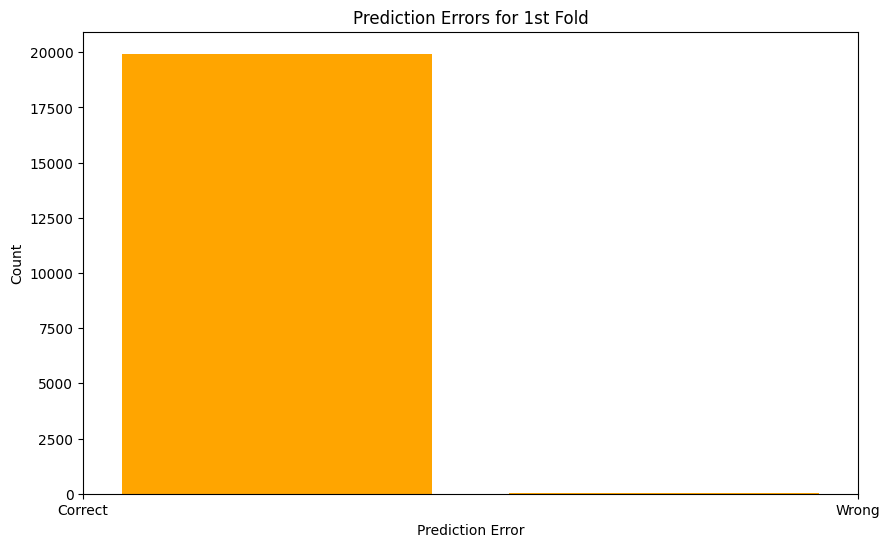

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize y_preds and y_tests
y_preds = []
y_tests = []

# Assuming 'kf' and 'X_scaled' are defined from your previous code
for train_index, test_index in kf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf.fit(X_train, y_train)

    # Append predictions and true labels for this fold
    y_preds.extend(clf.predict(X_test))  # Extend instead of append
    y_tests.extend(y_test.values)       # Extend instead of append

# Now you can calculate errors using y_preds and y_tests
errors = np.array(y_preds) != np.array(y_tests)  # Compare the flattened arrays

# Convert errors to integers (0 for Correct, 1 for Wrong)
errors_int = errors.astype(int)

# Пример: отображаем для первого fold
plt.figure(figsize=(10, 6))
plt.hist(errors_int, bins=2, rwidth=0.8, color='orange') # Use errors_int for histogram
plt.xticks([0, 1], ['Correct', 'Wrong'])
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.title(f'Prediction Errors for 1st Fold')
plt.show()

In [ ]:
import time

# Начало обучения
start_time = time.time()

# Обучение модели
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Время на обучение
training_time = time.time() - start_time

# Начало предсказания
start_time = time.time()

# Предсказание
y_pred = clf.predict(X_test)

# Время на предсказание
prediction_time = time.time() - start_time

print(f"Training Time: {training_time:.2f} seconds")
print(f"Prediction Time: {prediction_time:.2f} seconds")


Training Time: 9.91 seconds
Prediction Time: 0.04 seconds
